In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy import table
import numpy as np

csvR = "/home/boutigny/Images_Astro/Pix/Stage/IC_1396_Light_Rouge_300_secs_002_WCS.csv"
csvG = "/home/boutigny/Images_Astro/Pix/Stage/IC_1396_Light_Vert_300_secs_002_WCS.csv"
csvB = "/home/boutigny/Images_Astro/Pix/Stage/IC_1396_Light_Bleu_300_secs_002_WCS.csv"
red = ascii.read(csvR, format="csv", header_start=5, data_start=6, delimiter=";")
green = ascii.read(csvG, format="csv", header_start=5, data_start=6, delimiter=";")
blue = ascii.read(csvB, format="csv", header_start=5, data_start=6, delimiter=";")

In [14]:
blue

DATE_OBS,NAME,FILTER,CATRA,CATDEC,IMGRA,IMGDEC,IMGX,IMGY,<Gmag>,BKGROUND,BGSTDDEV,BGRJCT,PSF_A,PSF_SIGMAX,PSF_SIGMAY,PSF_THETA,PSF_MAD,FLUX8,SNR8,FLAG
float64,str20,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
2459101.40325,_2178419580183304960,B,323.733187,57.381658,323.733241,57.381594,1002.542,819.27,9.927,395.2941,18.14837,0.6648,1.2962909,5.51043955,5.22966327,174.05955,0.0045965,360577.08,587.1526,10
2459101.40325,_2178433903889527808,B,323.847703,57.52443,323.84788,57.524375,793.611,450.593,9.949,402.7412,18.14837,0.6648,1.30978,6.49280874,6.29598139,51.402196,0.00305314,486301.72,685.7777,10
2459101.40325,_2178393771715118080,B,324.331761,57.437216,324.331821,57.437169,112.681,760.225,9.993,398.6479,18.14837,0.6648,1.3132835,6.33474047,6.12516016,21.793219,0.00295184,467419.68,671.8856,10
2459101.40325,_2178416071185323136,B,323.942133,57.372038,323.942097,57.372026,700.111,878.16,10.046,401.3159,18.14837,0.6648,1.3036067,6.16733243,5.96292403,8.421533,0.00260918,444202.88,654.4021,10
2459101.40325,_2178448163180944896,B,324.201039,57.655089,324.201132,57.655022,243.291,150.04,10.127,393.3831,18.14837,0.6648,1.3023308,5.3663765,4.97243143,42.449442,0.00247393,336802.97,566.5889,11
2459101.40325,_2178425520113373440,B,323.556689,57.378582,323.556792,57.378519,1261.285,799.345,10.24,389.3103,18.14837,0.6648,1.3177758,6.21093467,5.80034004,165.99367,0.00298565,440375.53,651.475,10
2459101.40325,_2178415830667156608,B,323.985631,57.347974,323.985625,57.34796,643.353,950.163,10.267,400.2233,18.14837,0.6648,1.2991992,6.24515835,5.92227753,57.184325,0.00318789,443844.42,654.1285,11
2459101.40325,_2178446513913504000,B,324.110451,57.616864,324.110479,57.616795,385.565,240.275,10.38,395.6079,18.14837,0.6648,1.2776721,4.80174515,4.39721609,28.982668,0.00245897,269484.85,503.8724,10
2459101.40325,_2178446307755075072,B,324.063988,57.591233,324.064085,57.59116,460.167,302.813,10.465,396.5102,18.14837,0.6648,1.2960194,5.62769186,5.18414003,54.547789,0.00286391,362350.49,588.658,10


In [57]:
j1 = table.join(red, green, keys="NAME", table_names=["red", "green"])
rgb = table.join(j1, blue, keys="NAME")
flag = (rgb["FLAG_red"]==0) & (rgb["FLAG_green"]==0) & (rgb["FLAG"]==0) & (rgb["<Gmag>_red"]<15.5)
rgb = rgb[flag]
print(len(rgb))

276


(-0.1, 1.0)

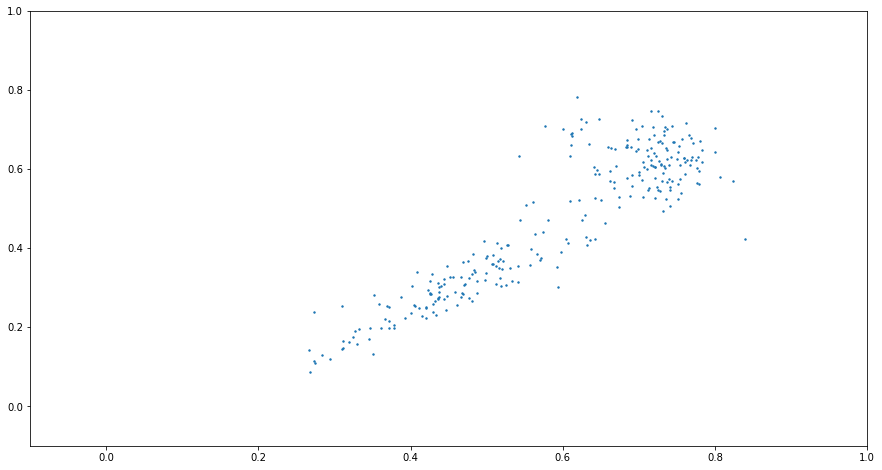

In [60]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(15, 8))
_ = ax0.scatter(-2.5*np.log10(rgb["FLUX8"])+2.5*np.log10(rgb["FLUX8_green"]), -2.5*np.log10(rgb["FLUX8_green"])+2.5*np.log10(rgb["FLUX8_red"]), s=2)
ax0.set_xlim([-0.1,1])
ax0.set_ylim([-0.1,1])

In [41]:
rgb

DATE_OBS_red,NAME,FILTER_red,CATRA_red,CATDEC_red,IMGRA_red,IMGDEC_red,IMGX_red,IMGY_red,<Gmag>_red,BKGROUND_red,BGSTDDEV_red,BGRJCT_red,PSF_A_red,PSF_SIGMAX_red,PSF_SIGMAY_red,PSF_THETA_red,PSF_MAD_red,FLUX8_red,SNR8_red,FLAG_red,DATE_OBS_green,FILTER_green,CATRA_green,CATDEC_green,IMGRA_green,IMGDEC_green,IMGX_green,IMGY_green,<Gmag>_green,BKGROUND_green,BGSTDDEV_green,BGRJCT_green,PSF_A_green,PSF_SIGMAX_green,PSF_SIGMAY_green,PSF_THETA_green,PSF_MAD_green,FLUX8_green,SNR8_green,FLAG_green,DATE_OBS,FILTER,CATRA,CATDEC,IMGRA,IMGDEC,IMGX,IMGY,<Gmag>,BKGROUND,BGSTDDEV,BGRJCT,PSF_A,PSF_SIGMAX,PSF_SIGMAY,PSF_THETA,PSF_MAD,FLUX8,SNR8,FLAG
float64,str20,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
2459101.43621,_2178368895265808768,B,324.257332,57.344263,324.257265,57.344259,237.254,1020.936,16.393,587.3051,22.91577,0.8445,0.067988,2.86221685,2.25834415,50.050687,0.0287462,4997.5749,28.20581,0,2459101.36941,B,324.257332,57.344263,324.257281,57.34426,259.378,991.601,16.393,446.2171,19.39728,0.7889,0.0388991,3.08413263,2.71151639,22.309883,0.0457497,3824.8991,25.36579,0,2459101.40325,B,324.257332,57.344263,324.257249,57.344163,246.902,1001.394,16.393,395.7778,18.14837,0.6648,0.0237917,3.2139933,3.04320971,51.138085,0.0635796,2373.4264,17.25089,0
2459101.43621,_2178369410661845120,B,324.109049,57.335579,324.108955,57.335578,456.699,1021.507,16.13,590.1819,22.91577,0.8445,0.0833516,2.80803303,2.40482069,50.809289,0.0430194,7516.9521,40.81866,0,2459101.36941,B,324.109049,57.335579,324.108958,57.33557,478.839,993.524,16.13,445.1521,19.39728,0.7889,0.0461356,3.00694838,2.81375749,145.69044,0.0561703,5023.2282,32.46822,0,2459101.40325,B,324.109049,57.335579,324.108914,57.335604,466.453,1002.565,16.13,396.1096,18.14837,0.6648,0.0302856,2.8091215,2.6735746,40.184543,0.0628927,3061.1621,21.85609,0
2459101.43621,_2178369445021630336,B,324.126702,57.346251,324.126613,57.346262,427.792,995.306,15.731,589.9284,22.91577,0.8445,0.1258058,2.89016311,2.26075016,52.728441,0.0205565,9664.1655,50.89208,0,2459101.36941,B,324.126702,57.346251,324.126621,57.346272,450.083,967.097,15.731,445.2958,19.39728,0.7889,0.0819736,2.88495614,2.7196115,14.801456,0.0242854,7245.0796,44.79643,0,2459101.40325,B,324.126702,57.346251,324.126612,57.346261,437.565,976.326,15.731,395.9898,18.14837,0.6648,0.0524287,2.91945666,2.72304332,12.034036,0.0331068,4868.9622,33.26444,0
2459101.43621,_2178369651180090368,B,324.234579,57.351217,324.234514,57.351204,268.569,998.615,16.696,587.4306,22.91577,0.8445,0.0516054,2.895137,2.4648532,58.363029,0.0428261,3764.2159,21.67489,0,2459101.36941,B,324.234579,57.351217,324.234501,57.351218,290.871,969.429,16.696,445.9299,19.39728,0.7889,0.0296447,3.01757804,2.49990217,14.531249,0.0532576,2305.6687,15.82857,0,2459101.40325,B,324.234579,57.351217,324.234506,57.351163,278.276,979.064,16.696,395.5252,18.14837,0.6648,0.0160505,3.10543612,2.92030772,156.85324,0.0990572,1517.4571,11.28757,0
2459101.43621,_2178369685539805952,B,324.212309,57.347571,324.212134,57.347588,302.333,1004.971,16.866,587.4211,22.91577,0.8445,0.0446908,3.08844992,2.35642521,29.269691,0.0508973,3778.7796,21.7535,0,2459101.36941,B,324.212309,57.347571,324.211827,57.348055,324.902,974.719,16.866,445.7839,19.39728,0.7889,0.2387813,3.2825188,0.31196688,113.6268,0.0295112,3219.2669,21.63953,0,2459101.40325,B,324.212309,57.347571,324.211994,57.347601,312.211,985.402,16.866,395.2474,18.14837,0.6648,0.0121882,3.21564035,2.44405283,9.58648,0.1489,955.10568,7.21771,0
2459101.43621,_2178369685550250112,B,324.206885,57.3572,324.20679,57.35721,307.409,978.063,15.496,587.8619,22.915